In [22]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #provides a high level interface of drawing informative statistical analysis
sns.set_style("ticks") #Five themes: darkgrid,whitegrid,dark,white,ticks
%matplotlib inline
plt.style.use("seaborn-poster") #make bigger plots

In [25]:
df=pd.read_csv("Documents\housing_prices_SLR.csv")

In [15]:
df.PRICE=np.round(df.PRICE/1000)

In [16]:
df.tail()

,AREA,PRICE
45,2350,16845.0
46,2380,17604.0
47,2410,17310.0
48,2440,14036.0
49,2470,13699.0


In [19]:
print(df.shape)
print(df.dtypes)
msk=np.random

(50, 2)
AREA       int64
PRICE    float64
dtype: object


In [26]:
x=df[["AREA"]].values
y=df[["PRICE"]].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)

In [27]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33, 1) (33, 1)
(17, 1) (17, 1)


In [28]:
print(x_train,y_train)
print(x_test,y_test)

[[2380]
 [2410]
 [1450]
 [1270]
 [1480]
 [1720]
 [2020]
 [1930]
 [1000]
 [2320]
 [1810]
 [1990]
 [1150]
 [1870]
 [1330]
 [2080]
 [1030]
 [1630]
 [1060]
 [2290]
 [2050]
 [1690]
 [2200]
 [1300]
 [1660]
 [1540]
 [2470]
 [1600]
 [1210]
 [2260]
 [1420]
 [1840]
 [2140]] [[17604075.37]
 [17310328.58]
 [ 7535461.53]
 [ 6147374.49]
 [ 9967519.85]
 [10229062.76]
 [15220368.6 ]
 [10204168.56]
 [ 5617528.34]
 [16292734.63]
 [10503302.71]
 [10240098.23]
 [ 4944801.22]
 [11526886.08]
 [ 7034644.09]
 [22270473.64]
 [ 5201397.67]
 [10200978.75]
 [ 4778957.34]
 [16968517.78]
 [12277970.63]
 [ 9774888.31]
 [12793010.05]
 [ 7717652.75]
 [10050908.9 ]
 [ 9761757.42]
 [13698832.88]
 [ 8073815.28]
 [ 5351641.54]
 [17207103.58]
 [ 7303844.72]
 [ 9763293.7 ]
 [12617860.41]]
[[1390]
 [2170]
 [1900]
 [2350]
 [1510]
 [2440]
 [1780]
 [1750]
 [1960]
 [1570]
 [1360]
 [1120]
 [2110]
 [1240]
 [1090]
 [1180]
 [2230]] [[ 9457409.28]
 [15457320.93]
 [ 9912288.39]
 [16844832.74]
 [ 7614220.  ]
 [14035821.57]
 [ 9287983.0

In [30]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 7668527.34626948],
       [14526267.26197481],
       [12152434.21423066],
       [16108822.62713758],
       [ 8723564.256378  ],
       [16900100.30971897],
       [11097397.30412215],
       [10833638.07659502],
       [12679952.66928492],
       [ 9251082.71143225],
       [ 7404768.11874235],
       [ 5294694.29852533],
       [13998748.80692056],
       [ 6349731.20863384],
       [ 5030935.0709982 ],
       [ 5822212.75357959],
       [15053785.71702907]])

In [32]:
y_test

array([[ 9457409.28],
       [15457320.93],
       [ 9912288.39],
       [16844832.74],
       [ 7614220.  ],
       [14035821.57],
       [ 9287983.04],
       [ 8314071.64],
       [ 9085279.91],
       [10066834.67],
       [ 8711980.68],
       [ 5657235.9 ],
       [12574439.45],
       [ 6289541.05],
       [ 5424564.78],
       [ 6474952.94],
       [12640883.01]])

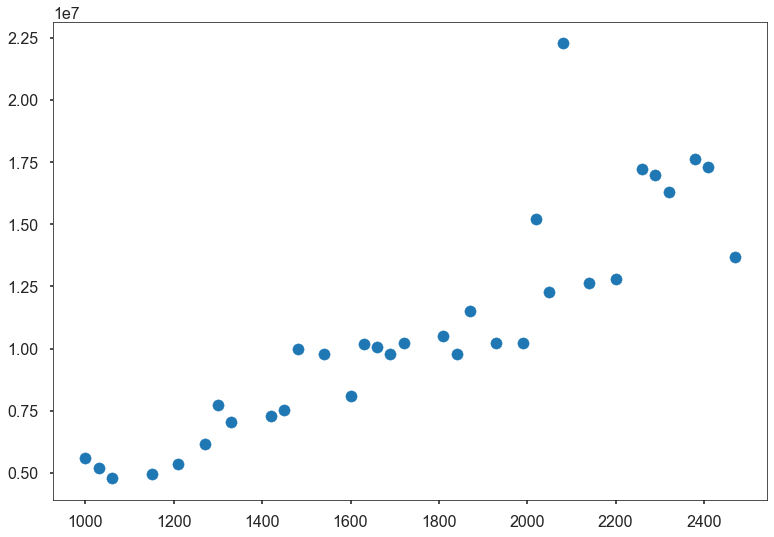

In [33]:
plt.scatter(x_train,y_train)


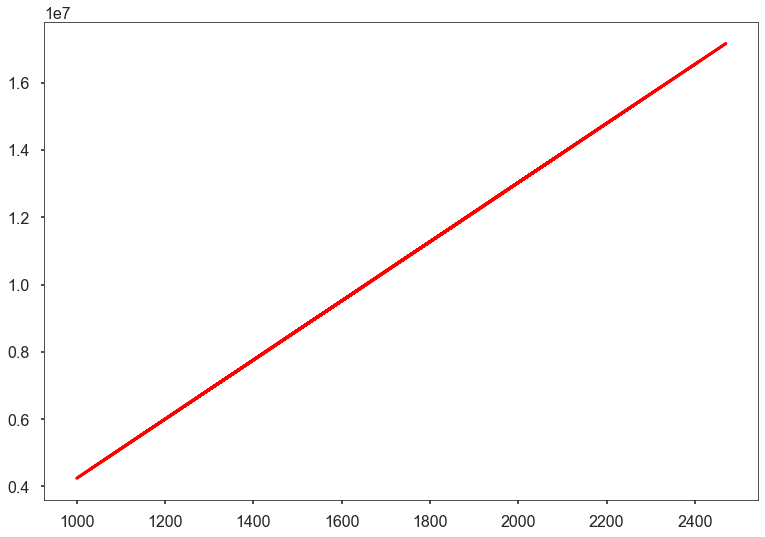

In [34]:
plt.plot(x_train,regressor.predict(x_train),color='red')

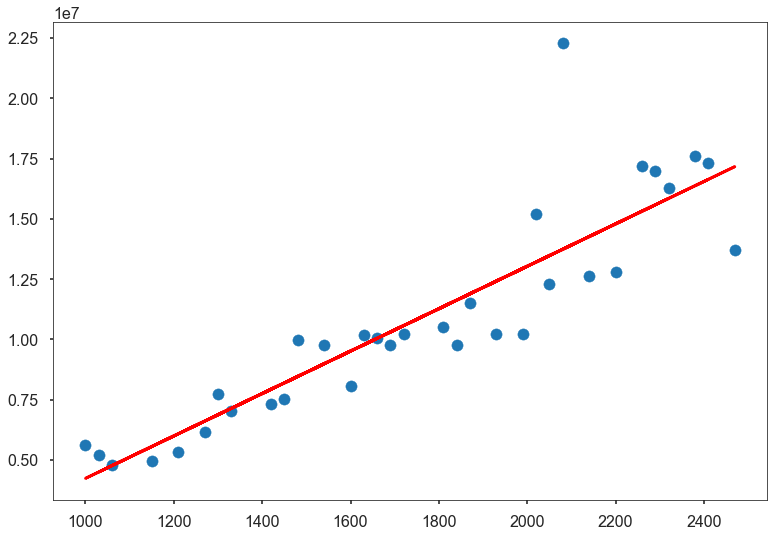

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')

Text(0.5, 1.0, 'HOUSE AREA VS HOUSE PRICE')

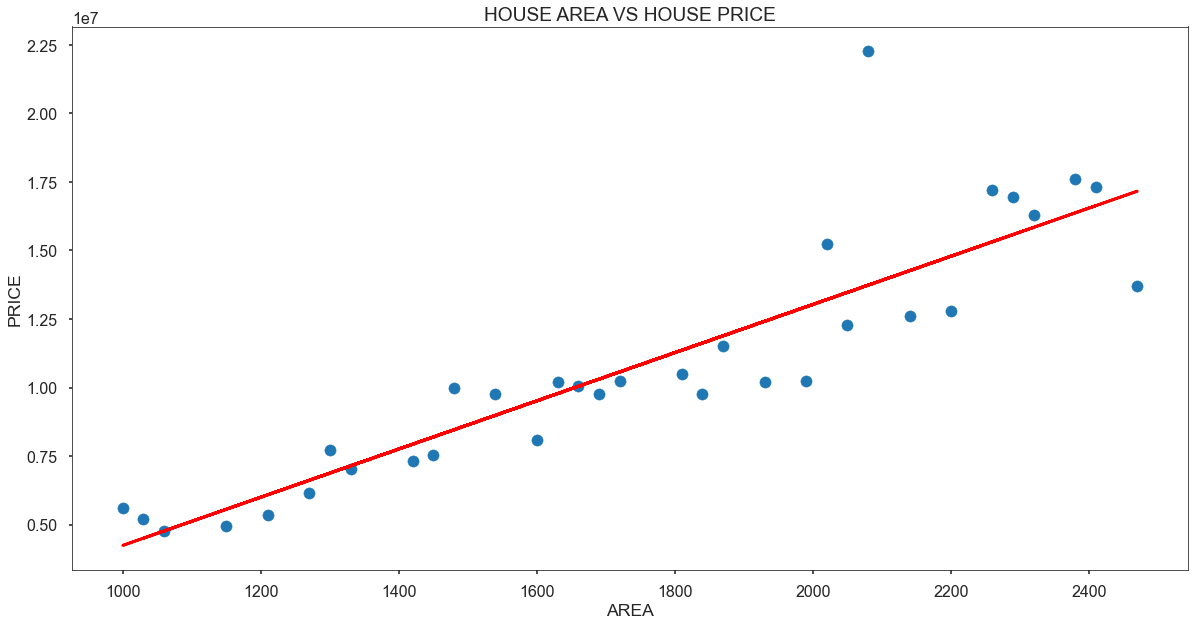

In [37]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.scatter(x_train,y_train,antialiased=True)
ax.plot(x_train,regressor.predict(x_train),color='red')
ax.set_xlabel("AREA")
ax.set_ylabel("PRICE")
ax.set_title("HOUSE AREA VS HOUSE PRICE")

In [39]:
baseline_pred=np.round(y_train.mean())
print("Baseline Prediction:",baseline_pred)

Baseline Prediction: 10793675.0


In [43]:
differences=y_train-baseline_pred
print("ERRORS:",differences)
squared_differences=differences**2
print("\nSquared Errors:",squared_differences)
sse=squared_differences.sum()
print("\nSum of squared errors for baseline model:",sse)

ERRORS: [[ 6810400.37]
 [ 6516653.58]
 [-3258213.47]
 [-4646300.51]
 [ -826155.15]
 [ -564612.24]
 [ 4426693.6 ]
 [ -589506.44]
 [-5176146.66]
 [ 5499059.63]
 [ -290372.29]
 [ -553576.77]
 [-5848873.78]
 [  733211.08]
 [-3759030.91]
 [11476798.64]
 [-5592277.33]
 [ -592696.25]
 [-6014717.66]
 [ 6174842.78]
 [ 1484295.63]
 [-1018786.69]
 [ 1999335.05]
 [-3076022.25]
 [ -742766.1 ]
 [-1031917.58]
 [ 2905157.88]
 [-2719859.72]
 [-5442033.46]
 [ 6413428.58]
 [-3489830.28]
 [-1030381.3 ]
 [ 1824185.41]]

Squared Errors: [[4.63815532e+13]
 [4.24667739e+13]
 [1.06159550e+13]
 [2.15881084e+13]
 [6.82532332e+11]
 [3.18786982e+11]
 [1.95956162e+13]
 [3.47517843e+11]
 [2.67924942e+13]
 [3.02396568e+13]
 [8.43160668e+10]
 [3.06447240e+11]
 [3.42093245e+13]
 [5.37598488e+11]
 [1.41303134e+13]
 [1.31716907e+14]
 [3.12735657e+13]
 [3.51288845e+11]
 [3.61768285e+13]
 [3.81286834e+13]
 [2.20313352e+12]
 [1.03792632e+12]
 [3.99734064e+12]
 [9.46191288e+12]
 [5.51701479e+11]
 [1.06485389e+12]
 [8.4399423

In [44]:
def sse(y_true,y_pred):
    return ((y_true-y_pred)**2).sum()

In [45]:
y_train_pred=regressor.predict(x_train)

In [46]:
sse_train=sse(y_train,y_train_pred)
print("Regression Model SSE:",sse_train)

Regression Model SSE: 131824692420147.73


In [47]:
from sklearn.metrics import r2_score

In [49]:
baseline_score=r2_score(y_train,[baseline_pred]*len(y_train))
print(baseline_score.round(2))

-0.0


In [50]:
model_score=r2_score(y_train,y_train_pred)
print(model_score.round(2))

0.78


In [51]:
test_score=r2_score(y_test,regressor.predict(x_test))
print(test_score.round(2))

0.71
